# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
# Import libries need with alias
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

df = pd.read_csv("Glassdoor_Gender_Pay_Gap.csv")

In [5]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [2]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.
<br><BR>
Red cells indicate positive correlation; blue cells indicate negative correlation; white cells indicate no correlation. The darker the colors, the stronger the correlation (positive or negative) between those two variables.

C:\Users\longs\AppData\Local\Temp\ipykernel_10396\1733990994.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


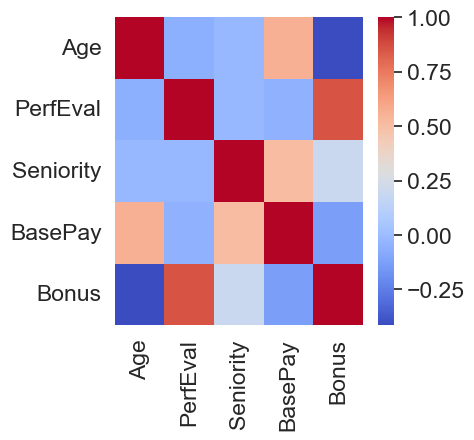

In [4]:
# Create tabular correlation matrix
corr = df.corr()
_, ax = plt.subplots(figsize=(4,4)) 

# Graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [9]:
X = df['Age']
y = df['Bonus']

In [10]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [11]:
# Take a look at the train dataset (Age)
X_train

420    46
278    47
218    38
363    57
850    48
       ..
855    49
871    48
835    45
792    52
520    53
Name: Age, Length: 700, dtype: int64

In [12]:
y_train

420    7744
278    7885
218    8978
363    6814
850    4415
       ... 
855    4851
871    4037
835    5120
792    5404
520    6866
Name: Bonus, Length: 700, dtype: int64

In [13]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [14]:
# Step 4 is to perform residual analysis
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    8918.825938
Age       -60.168608
dtype: float64

In [25]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Bonus   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           9.09e-32
Time:                        22:09:29   Log-Likelihood:                -6259.4
No. Observations:                 700   AIC:                         1.252e+04
Df Residuals:                     698   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8918.8259    215.096     41.464      0.000    8496.514    9341.138
Age          -60.1686      4.878    -12.336      0.000     -69.745     -50.592
==============================================================================
Omnibus:                      163.414   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.933
Skew:                           0.061   Prob(JB):                     1.92e-07
Kurtosis:                       1.978   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

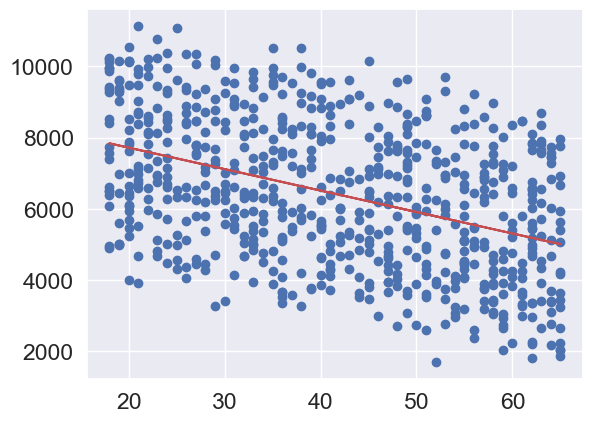

In [17]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 8918.8259 + -60.1686*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [18]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\longs\AppData\Local\Temp\ipykernel_10396\663898164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


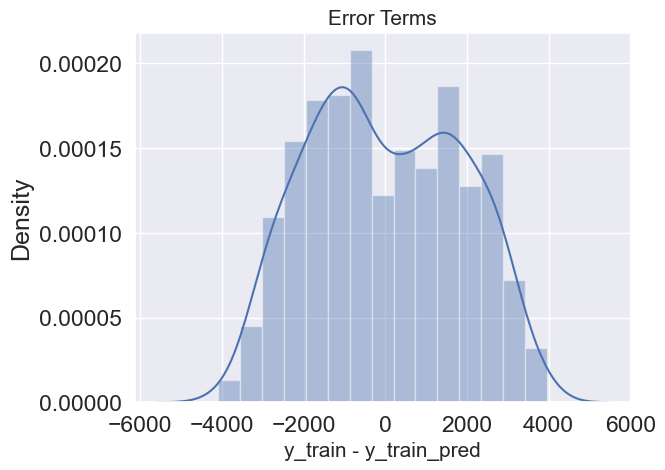

In [19]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

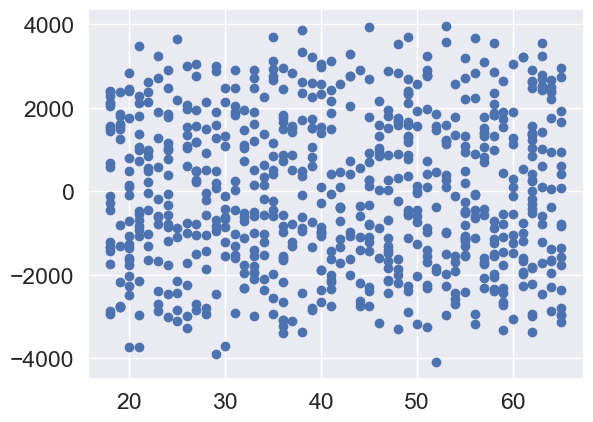

In [20]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [21]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

249    7414.610742
353    5368.878076
537    5970.564155
424    6211.238586
564    6933.261880
          ...     
193    6331.575802
838    6391.744409
974    6271.407194
203    6271.407194
425    5429.046684
Length: 300, dtype: float64

In [23]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.14403696771986862

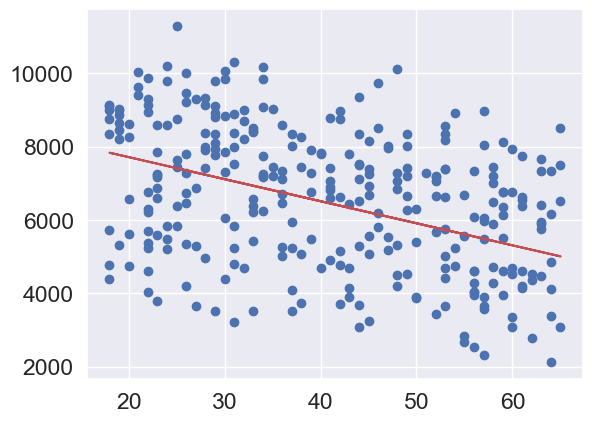

In [24]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.179
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It showed that there was a negative correlation. It did highlight this correlation, where my previous analysis did not. The older the employee is, the lower thier bonus tends to be. 
3. Was your plot of the error terms a bell curve? No